<img src="images/intro.jpeg">

# Project - Modelo Clustering

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">1. Imports</h1></center>
</div>

In [92]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sn
from matplotlib import pyplot as plt

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">2. Read Files</h1></center>
</div>

In [2]:
# ler base de dados relativa aos cursos
cursos = pd.read_csv("databases/cursos.csv")

del cursos["Unnamed: 0"]
cursos.columns

Index(['UTE_ID', 'F_CCURSO', 'F_DCURSO', 'F_HORAS', 'TIPO_UTENTE', 'CATEGORIA',
       'DCATEGORIA'],
      dtype='object')

In [3]:
# ler base de dados relativa aos pedidos
pedidos = pd.read_excel("databases/apura_iscte_lpedidos_apos.xlsx")
pedidos = pedidos.dropna()
pedidos.columns

Index(['UTE_ID', 'ANO_MES', 'DATA_MOVIMENTO', 'TIPO_MOVIMENTO',
       'DTIPO_MOVIMENTO', 'CENTROA', 'DCENTRO_AB', 'AREA_CURSO',
       'ANO_CONCLUSAO_CURSO', 'CEST_SUPERIOR', 'DEFICIENCIA', 'DDEFICIENCIA',
       'HABILITACAO', 'DHABILITACAO_ESCOLAR', 'DATA_NASCIMENTO', 'IDADE',
       'NACIONALIDADE', 'DNACIONALIDADE', 'FREGUESIA', 'DFREGUESIA', 'SEXO',
       'CATEGORIA', 'DCATEGORIA', 'DATA_INSCRICAO', 'MOTIVO_INSCRICAO',
       'DMOTIVO_INSCRICAO', 'RINSC', 'INT_TEMPO_INSCRICAO', 'CPP_PRETENDIDA',
       'DCPP_PRETENDIDA', 'CAE_ANTERIOR', 'DCAE', 'DATA_ANULACAO',
       'MOTIVO_ANULACAO', 'DMOTIVO_ANULACAO', 'DATA_COLOCACAO', 'CPP', 'DCPP',
       'CAE_COLOCACAO', 'DCAE_COLOCACAO', 'TIPO_CONTRATO_COLOC',
       'REGIME_CONTRATO_COLOC', 'REGIME_HORARIO', 'PAIS_COLOCACAO',
       'TIPO_OCUPACAO', 'ANOMES_FIM', 'ANOMES_12FIM'],
      dtype='object')

In [4]:
# ler base de dados relativa aos formandos
formandos = pd.read_csv("databases/formandos_limpo.csv")

del formandos["Unnamed: 0"]
formandos.columns

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['UTE_ID', 'CodCEFP', 'Sexo', 'IdadeEmAnos', 'CodHabilitacao',
       'CodNacionalidade', 'HorasForm', 'AreaFormacao', 'NivelFormacaoAccao',
       'CodSaidaProfissional', 'Sucessos', 'DuracaoFormacao'],
      dtype='object')

In [88]:
# ler ficheiro com informação dos centros de emprego por zona
centros = pd.read_excel("databases/AgrupamentoCentrosRegiao.xlsx")
centros.head(5)

,CodCEFP,Zona
0,302,Lisboa e Vale do Tejo
1,148,Norte
2,150,Norte
3,136,Norte
4,303,Lisboa e Vale do Tejo


<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">3. Merge DataFrames cursos e formandos</h1></center>
</div>

In [107]:
# realizar o merge entre tabela de formandos e de cursos
final_forms = formandos.merge(cursos, on="UTE_ID", how="left")
final_forms.shape

(117139, 18)

In [108]:
final_forms = final_forms.merge(centros, on="CodCEFP", how="left")
final_forms.shape

(117139, 19)

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">4. Final DataFrame</h1></center>
</div>

In [109]:
# filtrar apenas casos de sucesso
final_forms = final_forms[final_forms['Sucessos'] == 1]
final_forms.shape

(42217, 19)

In [111]:
# verificar que não existem duplicados no subconjunto utente / curso
final_forms.duplicated(subset=["UTE_ID", "F_CCURSO"]).sum()

0

In [112]:
# verificar valores omissos
final_forms.isnull().sum()

UTE_ID                     0
CodCEFP                    0
Sexo                       0
IdadeEmAnos                0
CodHabilitacao             0
CodNacionalidade           0
HorasForm                  0
AreaFormacao               0
NivelFormacaoAccao         0
CodSaidaProfissional       0
Sucessos                   0
DuracaoFormacao            0
F_CCURSO                4691
F_DCURSO                4691
F_HORAS                 4691
TIPO_UTENTE             4691
CATEGORIA               4691
DCATEGORIA              4691
Zona                    1118
dtype: int64

In [113]:
# eliminar NA's
final_forms = final_forms.dropna()
final_forms.shape

(36582, 19)

In [114]:
# guardar num csv final
final_forms.to_csv('databases/iefp_dados_combinados.csv')

In [115]:
final_forms.head()

,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,CATEGORIA,DCATEGORIA,Zona
7,155241,501,1,51,12,PT,447.0,812,5,8126,1,382 days 00:00:00.000000000,812061E,TÉCNICO/A ESPECIALISTA EM TURISMO DE AR LIVRE ...,1425.0,A,2.0,DESEMPREGADO-NOVO EMPREGO,Algarve
9,347421,204,0,50,12,PT,649.0,523,5,52321,1,351 days 00:00:00.000000000,34401ZZ,TÉCNICO/A DE CONTABILIDADE,1000.0,A,5.0,OCUPADO,Centro
10,347421,204,0,50,12,PT,649.0,523,5,52321,1,351 days 00:00:00.000000000,523101E,"AUTOMAÇÃO, ROBÓTICA E CONTROLO INDUSTRIAL",1560.0,A,5.0,OCUPADO,Centro
11,386656,502,1,50,12,PT,812.0,344,5,3443,1,403 days 00:00:00.000000000,344031E,TÉCNICO/A ESPECIALISTA EM CONTABILIDADE E FISC...,1400.0,A,5.0,OCUPADO,Algarve
14,405517,315,0,54,12,PT,1099.0,481,5,4816,1,332 days 00:00:00.000000000,481061E,GESTÃO DE REDES E SISTEMAS INFORMÁTICOS,1375.0,A,5.0,OCUPADO,Lisboa e Vale do Tejo


<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">5. Preparação dos dados para modelação</h1></center>
</div>

<br>

Para efetuar o modelo sobre os dados, é necessário selecionar as variáveis em modelação e normalizá-las.

In [155]:
# leitura do csv com os dados combinados
iefp = pd.read_csv('databases/iefp_dados_combinados.csv')

del iefp["Unnamed: 0"]

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.1. Seleção de features</h3></center>
</div>

In [156]:
# selecao das features para o clustering
features = ['CodCEFP', 'IdadeEmAnos', 'CodHabilitacao',
            'HorasForm', 'AreaFormacao', 'NivelFormacaoAccao',
            'CATEGORIA', 'Zona']

iefp = iefp[features]
iefp.head()

# dataframe para servir como input para o cluster
iefp_cluster = iefp
iefp_cluster.head()

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona
0,501,51,12,447.0,812,5,2.0,Algarve
1,204,50,12,649.0,523,5,5.0,Centro
2,204,50,12,649.0,523,5,5.0,Centro
3,502,50,12,812.0,344,5,5.0,Algarve
4,315,54,12,1099.0,481,5,5.0,Lisboa e Vale do Tejo


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.2. Agrupar variável Habilitação</h3></center>
</div>
<br>
Vamos agrupar os diferentes níveis de habilitação em graus mais gerais de ensino:

- 1: Sem escolaridade;
- 2: Ensino Primário;
- 3: Ensino Básico;
- 4: Ensino Secundário;
- 5: Ensino Superior;

In [157]:
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 1),'CodHabilitacao'] = 1
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 2),'CodHabilitacao'] = 1
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 4),'CodHabilitacao'] = 2
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 6),'CodHabilitacao'] = 3
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 9),'CodHabilitacao'] = 3
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 11),'CodHabilitacao'] = 4
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 12),'CodHabilitacao'] = 4
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 13),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 14),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 15),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 17),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 20),'CodHabilitacao'] = 5

In [158]:
# criação de uma dummy vaiable para a variável agrupada CodHabilitação
habs = pd.get_dummies(iefp_cluster["CodHabilitacao"], prefix="hab")

# adicionar variável dummy
iefp_cluster = pd.concat([iefp_cluster, habs] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,hab_1,hab_2,hab_3,hab_4,hab_5
0,501,51,4,447.0,812,5,2.0,Algarve,0,0,0,1,0
1,204,50,4,649.0,523,5,5.0,Centro,0,0,0,1,0
2,204,50,4,649.0,523,5,5.0,Centro,0,0,0,1,0
3,502,50,4,812.0,344,5,5.0,Algarve,0,0,0,1,0
4,315,54,4,1099.0,481,5,5.0,Lisboa e Vale do Tejo,0,0,0,1,0


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.3. Criar variável dummy para as HorasForm</h3></center>
</div>

In [159]:
iefp_cluster.loc[(iefp_cluster.HorasForm <= 100),'HorasForm'] = 1
iefp_cluster.loc[(iefp_cluster.HorasForm > 100) & (iefp_cluster.HorasForm <= 300),'HorasForm'] = 2
iefp_cluster.loc[(iefp_cluster.HorasForm > 300) & (iefp_cluster.HorasForm <= 1000),'HorasForm'] = 3
iefp_cluster.loc[(iefp_cluster.HorasForm > 1000) & (iefp_cluster.HorasForm <= 2000),'HorasForm'] = 4
iefp_cluster.loc[(iefp_cluster.HorasForm > 2000),'HorasForm'] = 5

In [160]:
iefp_cluster["HorasForm"].value_counts()

1.0    21960
2.0     7501
3.0     5556
4.0     1549
5.0       16
Name: HorasForm, dtype: int64

In [161]:
# criação de uma dummy vaiable para a variável agrupada CodHabilitação
horas = pd.get_dummies(iefp_cluster["HorasForm"], prefix="horas")

# adicionar variável dummy
iefp_cluster = pd.concat([iefp_cluster, horas] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,horas_4.0,horas_5.0
0,501,51,4,3.0,812,5,2.0,Algarve,0,0,0,1,0,0,0,1,0,0
1,204,50,4,3.0,523,5,5.0,Centro,0,0,0,1,0,0,0,1,0,0
2,204,50,4,3.0,523,5,5.0,Centro,0,0,0,1,0,0,0,1,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,0,0,0,1,0,0,0,1,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,0,0,0,1,0,0,0,0,1,0


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.4. Criar variável dummy para a Area da Formação</h3></center>
</div>

In [162]:
# criação de uma dummy vaiable para a variável agrupada CodHabilitação
areas = pd.get_dummies(iefp_cluster["AreaFormacao"], prefix="area")

# adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, areas] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,hab_1,hab_2,...,area_811,area_812,area_813,area_814,area_815,area_840,area_850,area_861,area_862,area_999
0,501,51,4,3.0,812,5,2.0,Algarve,0,0,...,0,1,0,0,0,0,0,0,0,0
1,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,0,0,0,0,0,0,0,0
2,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,0,0,0,0,0,0,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,0,0,...,0,0,0,0,0,0,0,0,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.5. Criar variável dummy para o Nível da Formação</h3></center>
</div>

In [163]:
# criação de uma dummy vaiable para a variável agrupada CodHabilitação
niveis = pd.get_dummies(iefp_cluster["NivelFormacaoAccao"], prefix="nivel")

# adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, niveis] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,hab_1,hab_2,...,area_862,area_999,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_L,nivel_T
0,501,51,4,3.0,812,5,2.0,Algarve,0,0,...,0,0,0,0,0,0,0,1,0,0
1,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,0,0,0,0,0,1,0,0
2,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,0,0,0,0,0,1,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,0,0,...,0,0,0,0,0,0,0,1,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,0,0,...,0,0,0,0,0,0,0,1,0,0


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.6. Criar variável dummy para as Categorias</h3></center>
</div>

In [164]:
# criação de uma dummy vaiable para a variável agrupada CodHabilitação
cat = pd.get_dummies(iefp_cluster["CATEGORIA"], prefix="cat")

# adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, cat] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,hab_1,hab_2,...,nivel_3,nivel_4,nivel_5,nivel_L,nivel_T,cat_1.0,cat_2.0,cat_3.0,cat_4.0,cat_5.0
0,501,51,4,3.0,812,5,2.0,Algarve,0,0,...,0,0,1,0,0,0,1,0,0,0
1,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,1,0,0,0,0,0,0,1
2,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,1,0,0,0,0,0,0,1
3,502,50,4,3.0,344,5,5.0,Algarve,0,0,...,0,0,1,0,0,0,0,0,0,1
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,0,0,...,0,0,1,0,0,0,0,0,0,1


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.7. Criar variável dummy para as Zonas</h3></center>
</div>

In [165]:
# criação de uma dummy vaiable para a variável agrupada Zona
zonas = pd.get_dummies(iefp_cluster["Zona"], prefix="zona")

# adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, zonas] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,hab_1,hab_2,...,cat_1.0,cat_2.0,cat_3.0,cat_4.0,cat_5.0,zona_Alentejo,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte
0,501,51,4,3.0,812,5,2.0,Algarve,0,0,...,0,1,0,0,0,0,1,0,0,0
1,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,0,0,1,0,0,1,0,0
2,204,50,4,3.0,523,5,5.0,Centro,0,0,...,0,0,0,0,1,0,0,1,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,0,0,...,0,0,0,0,1,0,1,0,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,0,0,...,0,0,0,0,1,0,0,0,1,0


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.8. Normalização dos dados</h3></center>
</div>

In [175]:
# apagar colunas 
del iefp_cluster["CodHabilitacao"]
del iefp_cluster["HorasForm"]
del iefp_cluster["AreaFormacao"]
del iefp_cluster["NivelFormacaoAccao"]
del iefp_cluster["CATEGORIA"]
del iefp_cluster["Zona"]

,CodCEFP,IdadeEmAnos,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,...,cat_1.0,cat_2.0,cat_3.0,cat_4.0,cat_5.0,zona_Alentejo,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte
0,501,51,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,204,50,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,204,50,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,502,50,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,315,54,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36577,202,21,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
36578,202,21,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
36579,501,20,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
36580,501,22,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [177]:
# normalizacao das variaveis
from sklearn.preprocessing import *

scaler = MinMaxScaler().fit(iefp_cluster)
iefp_norm = pd.DataFrame(scaler.transform(iefp_cluster)) # dados dos utentes de sucesso normalizados

In [178]:
iefp_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,...,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000,36582.000000
mean,0.346582,0.412214,0.007271,0.043300,0.372861,0.391340,0.185228,0.600295,0.205046,0.151878,...,0.069351,0.294899,0.127986,0.007791,0.499973,0.113280,0.052403,0.261085,0.299492,0.273741
std,0.283140,0.203216,0.084963,0.203534,0.483572,0.488057,0.388487,0.489844,0.403741,0.358907,...,0.254054,0.456004,0.334079,0.087922,0.500007,0.316939,0.222841,0.439232,0.458042,0.445884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.071053,0.245283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.223684,0.415094,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.566038,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">6. Conjunto treino / teste</h1></center>
</div>

<br>

Para testar o modelo, são divididos os dados em 80% para o conjunto treino e os restantes para o conjunto de teste.

In [179]:
from sklearn.model_selection import train_test_split

# divisao treino/teste dos dados normalizados
train, test = train_test_split(iefp_norm, 
                 train_size=0.8, 
                 random_state=5)

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">7. Clustering</h1></center>
</div>

### **para consulta do grupo apenas**

documentação do package usado para o GMM (Gaussian Mixture Model):
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

como selecionar componentes:
https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

In [180]:
from sklearn import mixture

## selecionar o número de clusters/componentes a usar

scores = [] # valores do average log-likelihood score
aic = [] # valores do aic de cada modelo

for i in range(1, 20):
    modelo = mixture.GaussianMixture(n_components=i)
    modelo.fit(train)
    # guarda resultados de cada iteracao:
    scores.append(modelo.score(train, test))
    aic.append(modelo.aic(test))

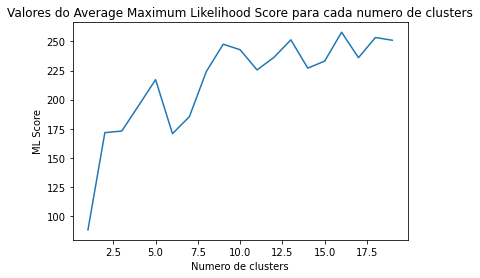

In [181]:
plt.plot(range(1,20), scores)
plt.title('Valores do Average Maximum Likelihood Score para cada numero de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('ML Score')
plt.show()

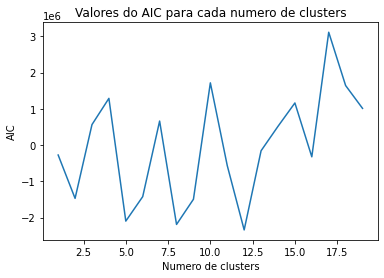

In [182]:
plt.plot(range(1,20), aic)
plt.title('Valores do AIC para cada numero de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('AIC')
plt.show()

Tanto as métricas AIC e ML-Score indicam que podem ser usados 11 clusters.

In [183]:
# construção do modelo com 11 clusters
modelo_GMM = mixture.GaussianMixture(n_components=11)
modelo_GMM.fit(train)

GaussianMixture(n_components=11)

In [184]:
# exemplo previsao da label/grupo
modelo_GMM.predict(test)[0]

1

In [188]:
# exemplo previsao probabilidades a posteriori
predict = pd.DataFrame(modelo_GMM.predict_proba(test))
predict

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
1,0.0,1.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
2,0.0,0.0,0.0,1.123611e-32,0.0,1.0,2.891586e-09,0.000000,0.000000e+00,0.000000,0.0
3,0.0,0.0,1.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
4,0.0,0.0,0.0,2.591538e-41,0.0,0.0,0.000000e+00,0.000002,0.000000e+00,0.999998,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7312,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,1.000000,9.900059e-47,0.000000,0.0
7313,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,1.000000,0.0
7314,0.0,0.0,1.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
7315,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.0
